# Basic Example

## Importing packages

You first need to import the `af2_analysis` package:

In [1]:
import af2_analysis

%matplotlib inline

## Importing Alphafold Data 

To import your data, create a `af2_analysis.Data` object by giving the path of Alphafold directorie:

In [2]:
DATA_PATH = '../../../src/af2_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/'
my_data = af2_analysis.Data(DATA_PATH)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

You now have access to a pandas `DataFrame` containing all models:

In [3]:
my_data.df.head(2)

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,relaxed_pdb,json
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,../../../src/af2_analysis/test/inputs/beta_amy...,None,../../../src/af2_analysis/test/inputs/beta_amy...


For each query of the directorie, the chains IDs and chain length will be store in `chains` and `chain_length` properties of the `Data` object:

In [4]:
my_data.chain_length

{'beta_amyloid_dimer_d2fa3_0': [42, 42]}

In [5]:
my_data.chains

{'beta_amyloid_dimer_d2fa3_0': ['A', 'B']}

## Analysing scores

You can then sort or extract your models based on the score you are interrested in:

* pLDDT
* pTM
* ipTM
* ranking_confidence

Here I am extracting the best `ipTM` model index:

In [6]:
best_ipTM_index = my_data.df['ipTM'].idxmax()
worst_ipTM_index = my_data.df['ipTM'].idxmin()

You can get access to all its caracteristics:

In [7]:
my_data.df.iloc[best_ipTM_index]

query                                        beta_amyloid_dimer_d2fa3_0
seed                                                                  2
model                                                                 5
weight                                           alphafold2_multimer_v3
recycle                                                               9
pLDDT                                                              68.3
pTM                                                               0.628
ipTM                                                              0.604
ranking_confidence                                               0.6088
pdb                   ../../../src/af2_analysis/test/inputs/beta_amy...
relaxed_pdb           ../../../src/af2_analysis/test/inputs/beta_amy...
json                  ../../../src/af2_analysis/test/inputs/beta_amy...
Name: 14, dtype: object

### Plots

You can plot the the pLDDT for one model:

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

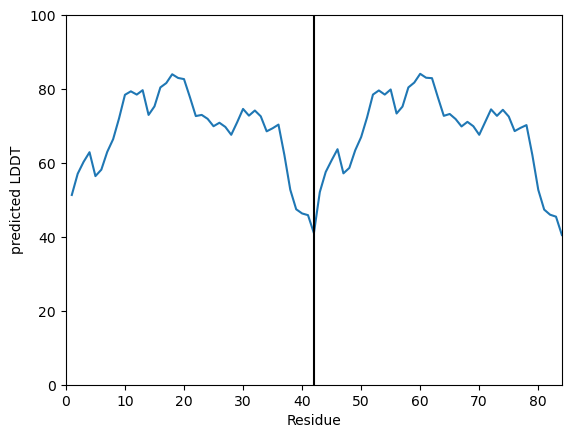

In [8]:
my_data.plot_plddt([best_ipTM_index])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Residue', ylabel='predicted LDDT'>)

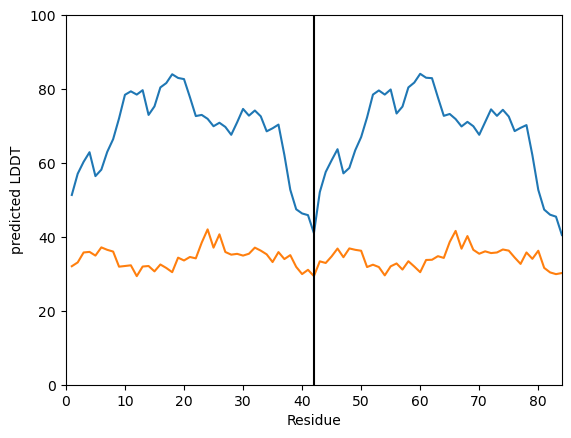

In [9]:
my_data.plot_plddt([best_ipTM_index, worst_ipTM_index])

And also have a look on the Predicted Aligned Error (PAE) matrix:

(<Figure size 640x480 with 2 Axes>, <Axes: >)

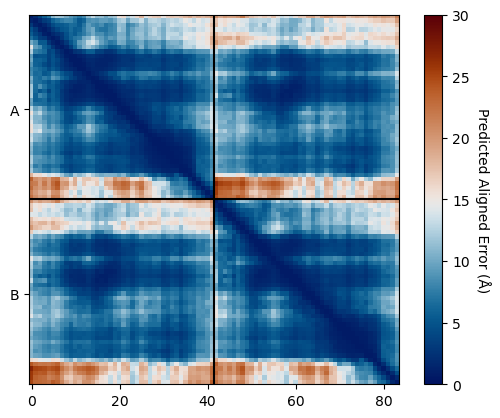

In [10]:
my_data.plot_pae(best_ipTM_index)

### show 3D structure

The 3D structure can be represented using the `nglview` library:

In [11]:
view = my_data.show_3d(best_ipTM_index)
view

NGLWidget()

In [12]:
import nglview
nglview.write_html('../_static/dimer.html', [view])

In [13]:
from IPython.display import IFrame

In [14]:
IFrame(src='../_static/dimer.html', width=600, height=300)

## Computing scores

Additional scores can be computed as the pdockq and pdockq2:

In [15]:
from af2_analysis import analysis

#compute_pdockq
analysis.pdockq(my_data)
#compute_pdockq2
analysis.pdockq2(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Some additional scores have been compute to caracterise the protein-peptide structures:

In [16]:
from af2_analysis import docking

#extract_pae_pep
docking.pae_pep(my_data)
#compute_pdockq2_lig
docking.pdockq2_lig(my_data)
#compute_LIS_pep
docking.LIS_pep(my_data)
#extract_plddt_pep
docking.plddt_pep(my_data)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [17]:
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'pdockq',
       'pdockq2_A', 'pdockq2_B', 'PAE_pep_rec', 'PAE_rec_pep', 'pdockq2_lig',
       'LIS', 'LIS_rec_pep', 'LIS_pep_rec', 'plddt_pep'],
      dtype='object')

## Clustering

Eventually the obtain models can be clustered to have a better idea oh AlphaFold model diversity. Here we are using
a thresold of 4 Å with hierarchical clustering:

/home/murail/miniforge3/envs/openmm/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/home/murail/miniforge3/envs/openmm/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

/home/murail/miniforge3/envs/openmm/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


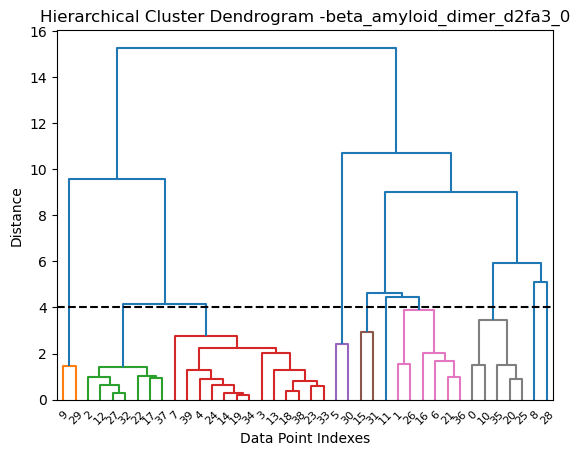

In [18]:
from af2_analysis import clustering
clustering.hierarchical(my_data.df, threshold=4)

Alternatively, the RMSD can be normalized and scaled using Bjorn Wallner scaling. Here we are using
a thresold of 0.3 with hierarchical clustering:

/home/murail/miniforge3/envs/openmm/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py:725: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

/home/murail/miniforge3/envs/openmm/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


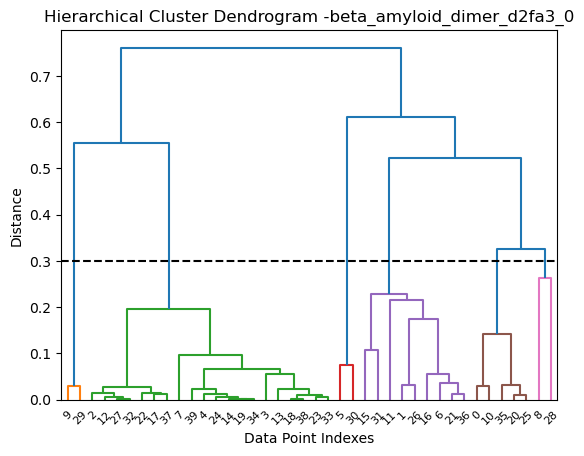

In [19]:
clustering.hierarchical(my_data.df, threshold=0.3, rmsd_scale=True)

## Multidimensional scaling representation

Multidimensional scaling (MDS) coordinates are computed from the distance matrix and added in the dataframe:

<Axes: xlabel='MDS 1', ylabel='MDS 2'>

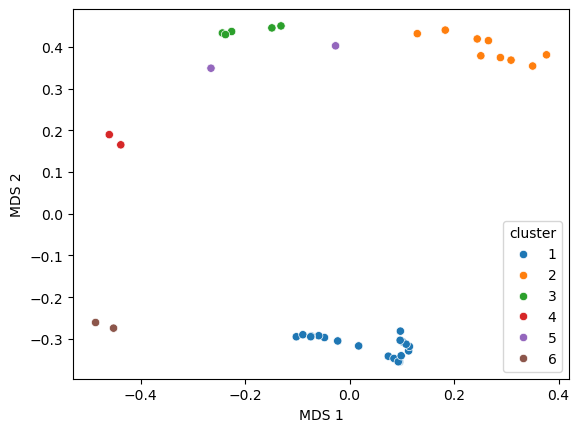

In [20]:
import seaborn as sns
sns.scatterplot(data=my_data.df, x='MDS 1', y='MDS 2', hue='cluster')